### Importing the data

In [1]:
import numpy as np 
import pandas as pd

### Understanding the data

In [2]:
import os
os.chdir("C:\\Users\\somenath\\Downloads")

In [3]:
df= pd.read_csv("churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [7]:
df.Churn.replace(('Yes','No'),(1,0),inplace = True)

In [8]:
df_Churned=df.drop(df[df['Churn'] == 0].index)

In [9]:
df_not_Churned=df.drop(df[df["Churn"]==1].index)

In [10]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [11]:
round(df["Churn"].value_counts()/df.shape[0]*100,0)

0    73.0
1    27.0
Name: Churn, dtype: float64

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [14]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [15]:
round((pd.crosstab(df.SeniorCitizen,df.Churn,margins=True)/df.shape[0]*100),0)

Churn,0,1,All
SeniorCitizen,,,
0,64.0,20.0,84.0
1,9.0,7.0,16.0
All,73.0,27.0,100.0


In [23]:
round(pd.crosstab(df.Churn,df.gender,margins= True)/df.shape[0]*100)

gender,Female,Male,All
Churn,,,
0,36.0,37.0,73.0
1,13.0,13.0,27.0
All,50.0,50.0,100.0


In [26]:
round(pd.crosstab(df.Churn,df.Partner, margins = True)/df.shape[0]*100)

Partner,No,Yes,All
Churn,,,
0,35.0,39.0,73.0
1,17.0,9.0,27.0
All,52.0,48.0,100.0


In [27]:
round(pd.crosstab(df.Churn,df.Dependents, margins= True)/df.shape[0]*100)

Dependents,No,Yes,All
Churn,,,
0,48.0,25.0,73.0
1,22.0,5.0,27.0
All,70.0,30.0,100.0


In [45]:
round(pd.crosstab(df.Churn,df.Partner,margins=True)/df.shape[0]*100)

Partner,No,Yes,All
Churn,,,
0,35.0,39.0,73.0
1,17.0,9.0,27.0
All,52.0,48.0,100.0


In [30]:
round(pd.crosstab(df.Churn,df.PhoneService,margins= True)/df.shape[0]*100)

PhoneService,No,Yes,All
Churn,,,
0,7.0,66.0,73.0
1,2.0,24.0,27.0
All,10.0,90.0,100.0


In [32]:
round(pd.crosstab(df.Churn, df.InternetService, margins=True)/df.shape[0]*100)

InternetService,DSL,Fiber optic,No,All
Churn,,,,
0,28.0,26.0,20.0,73.0
1,7.0,18.0,2.0,27.0
All,34.0,44.0,22.0,100.0


In [38]:
round(pd.crosstab(df.Churn, df.Contract, margins=True)/df.shape[0]*100)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
0,32.0,19.0,23.0,73.0
1,23.0,2.0,1.0,27.0
All,55.0,21.0,24.0,100.0


In [42]:
round(pd.crosstab(df['Churn'],df['PaperlessBilling'],margins= True)/df.shape[0]*100)

PaperlessBilling,No,Yes,All
Churn,,,
0,34.0,39.0,73.0
1,7.0,20.0,27.0
All,41.0,59.0,100.0


In [43]:
round(pd.crosstab(df.Churn, df.PaymentMethod, margins=True)/df.shape[0]*100)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
0,18.0,18.0,18.0,19.0,73.0
1,4.0,3.0,15.0,4.0,27.0
All,22.0,22.0,34.0,23.0,100.0


### Data Manipulation

In [46]:
df['TotalCharges']= df['TotalCharges'].replace(" ", np.nan)

In [47]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [56]:
df["TotalCharges"].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [57]:
df['TotalCharges']= df['TotalCharges'].astype(float)

In [58]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [59]:
df["TotalCharges"].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

### Data Visualization

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

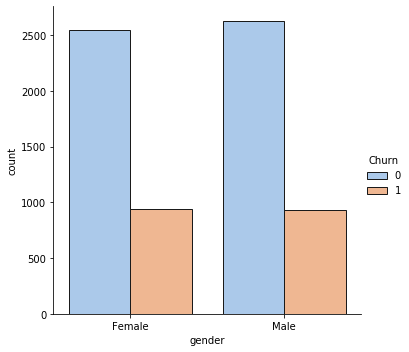

In [62]:
sns.catplot(x="gender", hue="Churn", kind="count",
            palette="pastel", edgecolor=".1",
            data=df);

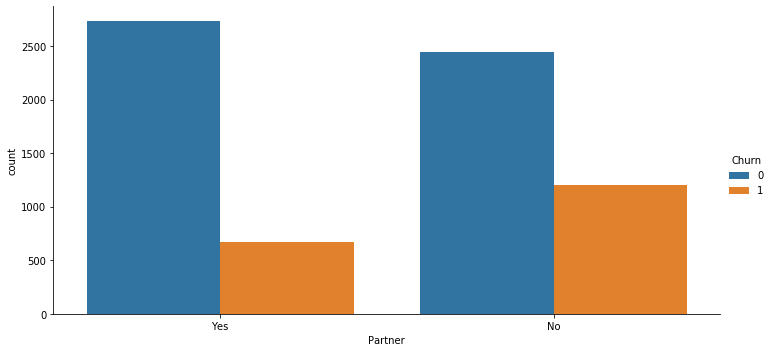

In [63]:
sns.catplot(x="Partner", hue="Churn",data=df, kind="count", aspect=2 );

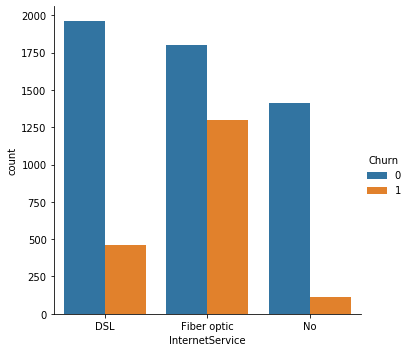

In [93]:
sns.catplot(x="InternetService" , hue= "Churn",data=df, kind="count",aspect =1)

In [16]:
### Conclusion: What all did you understand from the above charts

1. There is equal number of male and female churned.
2. Its seems that customers who have no Partners and no Dependents tend to churn a lot(17% and 22%)respectively.
3. Out of 44 %, 18% customers have churned those who use Fibre Optic Internet service in Internet Services.
4. It is also observed that the people who use month-to-month contract churn a lot (23% out of 55%)
5. The customers who use to pay using Electronic check they also churn around 15% out of 34%.

### Implement Machine Learning Models

In [94]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
df = pd.get_dummies(df,columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                                 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                 'Contract','PaperlessBilling','PaymentMethod','SeniorCitizen'],drop_first=True)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
Scaler = StandardScaler()

In [117]:
Columns_scaling = ["tenure", "MonthlyCharges", "TotalCharges"]

In [119]:
df[Columns_scaling] = Scaler.fit_transform(df[Columns_scaling])

In [120]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0.066327,-0.259629,-0.173876,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,-1.236724,-0.362660,-0.960399,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,0.514251,-0.746535,-0.195400,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,-1.236724,0.197365,-0.941193,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [122]:
df.drop(['customerID'],axis=1, inplace = True)

In [123]:
df.shape

(7043, 31)

In [129]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [224]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,max_depth=5).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [225]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [226]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[961  80]
 [208 160]]
0.7955997161107168
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1041
           1       0.67      0.43      0.53       368

    accuracy                           0.80      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [135]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [136]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [137]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'entropy'}

In [138]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=890, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
best_random_grid=rf_randomcv.best_estimator_

In [140]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[938 103]
 [197 171]]
Accuracy Score 0.78708303761533
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.62      0.46      0.53       368

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [141]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'entropy'}

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [890], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [1000, 1100, 1200, 1300, 1400]}


In [143]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 51.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [144]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=890, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
best_grid=grid_search.best_estimator_

In [148]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[940 101]
 [197 171]]
Accuracy Score 0.7885024840312278
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.46      0.53       368

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [151]:
best_grid.feature_importances_

array([0.17958004, 0.11789046, 0.16430099, 0.01803357, 0.01715792,
       0.01546669, 0.00445799, 0.0042687 , 0.01711   , 0.0560522 ,
       0.01016348, 0.01109544, 0.02954563, 0.00994323, 0.01921072,
       0.01155132, 0.01363285, 0.01131613, 0.02608487, 0.01201507,
       0.01433072, 0.01023232, 0.01374407, 0.03573152, 0.07285971,
       0.02091068, 0.01235145, 0.04812674, 0.00956988, 0.01326561])

In [152]:
imp_feat=pd.Series(rf_classifier.feature_importances_,index=X.columns.tolist())
imp_feat.sort_values(ascending=False)

TotalCharges                             0.183225
MonthlyCharges                           0.165605
tenure                                   0.165569
Contract_Two year                        0.053618
PaymentMethod_Electronic check           0.041079
InternetService_Fiber optic              0.029127
gender_Male                              0.026569
TechSupport_Yes                          0.025729
Contract_One year                        0.025667
OnlineSecurity_Yes                       0.024139
PaperlessBilling_Yes                     0.022773
Partner_Yes                              0.022654
SeniorCitizen_1                          0.022642
MultipleLines_Yes                        0.022180
OnlineBackup_Yes                         0.020193
StreamingMovies_Yes                      0.020151
Dependents_Yes                           0.020065
StreamingTV_Yes                          0.018104
DeviceProtection_Yes                     0.017616
DeviceProtection_No internet service     0.014700


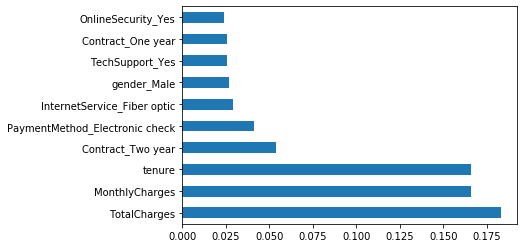

In [153]:
imp_feat.nlargest(10).plot(kind='barh')

In [221]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", splitter='best',max_depth=7,min_samples_split=100,
                                        min_samples_leaf=4,random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [222]:
y_pred = classifier.predict(X_test)

In [223]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[923 118]
 [176 192]]
Accuracy Score 0.7913413768630234
Classification report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.52      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [168]:
!pip install xgboost

In [183]:
import xgboost

In [184]:
clf_xgb = xgboost.XGBClassifier(random_state=10)

In [185]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [186]:
Y_pred = clf_xgb.predict(X_test)

In [187]:
y_pred = clf_xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[916 125]
 [188 180]]
Accuracy Score 0.7778566359119943
Classification report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.59      0.49      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



### Final Conclusions

Random forest has the highest accuracy score with 79.55 %
Decison Tree has the accuracy score of 79.13%

In [255]:
df['Probability_of _churn']= rf_classifier.predict_proba(df[X_test.columns])[:,1]

In [258]:
df[['Probability_of _churn']].head()

,Probability_of _churn
0,0.536547
1,0.141987
2,0.416807
3,0.080862
4,0.700557
